In [1]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv('./updated_dataset_for_cdom.csv')

y = data['cdom'].values
X = data.iloc[ :,0:35]
X = X.drop(['cdom'], axis=1).values



# y = data['cdom'].values
# y=y.iloc[:, 0:34]
# X = data.drop(['cdom'], axis=1).values
# X=X.iloc[:, 0:34]
wl = np.arange(400,600,6)

In [3]:
print(len(y))
print(X.shape)

200
(200, 34)


In [4]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
   
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
       
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/n_comp
       
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
   
    
    return msemin

100% completed
Suggested number of components:  1



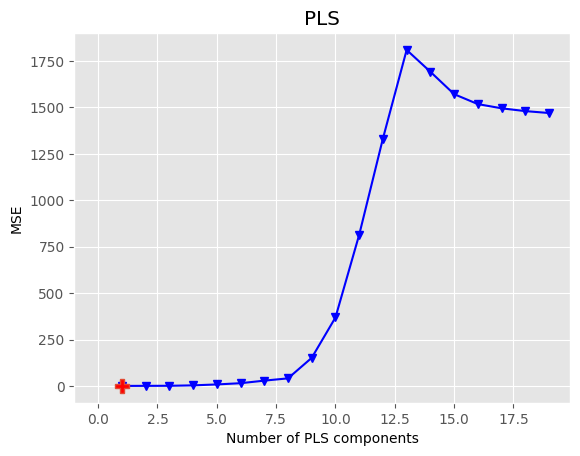

In [5]:
msemin=optimise_pls_cv(X,y,20, plot_components=True)

R2 calib: 1.000
MAE calib: 0.000
MSE calib: 0.000


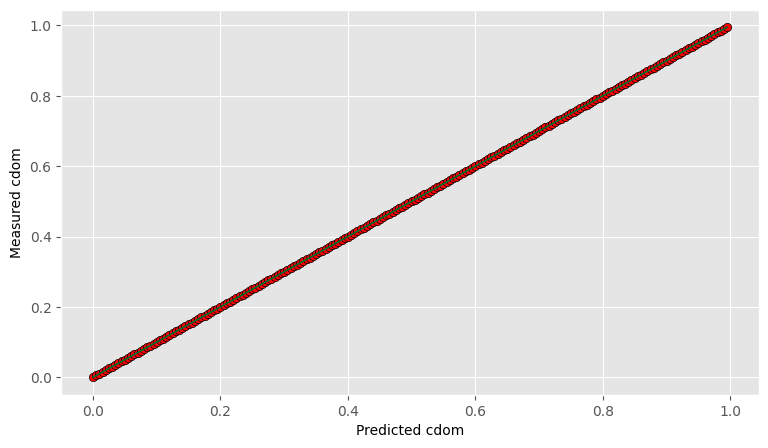

In [6]:


pls_opt = PLSRegression(n_components=18)


pls_opt.fit(X, y)
y_c = pls_opt.predict(X)


# y_cv = cross_val_predict(pls_opt, X, y, cv=10)


score_c = r2_score(y, y_c)
# score_cv = r2_score(y, y_cv)


mse_c = mean_squared_error(y, y_c)
# mse_cv = mean_squared_error(y, y_cv)
mae_c=mean_absolute_error(y,y_c)
# mae_cv=mean_absolute_error(y,y_cv)

print('R2 calib: %5.3f'  % score_c)
# print('R2 CV: %5.3f'  % score_cv)
print('MAE calib: %5.3f' % mae_c)
# print('MAE CV: %5.3f' % mae_cv)
print('MSE calib: %5.3f' % mse_c)
# print('MSE CV: %5.3f' % mse_cv)



rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)


z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
#         plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted cdom')
    plt.ylabel('Measured cdom')

    plt.show()


In [7]:
data1 = pd.read_csv('./Transposed_graph_data_cdom.csv')
y1 = data1['cdom'].values
X1 = data1.iloc[ :,0:35]
X1 = X1.drop(['cdom'], axis=1).values
# y1 = data1['cdom'].values
# X1 = data1.iloc[0:34, :]
# X1 = X1.drop(['cdom'], axis=1)
# y1 = data1['cdom'].values
# X1 = data1.drop(['cdom'], axis=1).values
# X1=X1[0:34]
# y1=y1[0:34]
wl1 = np.arange(400,600,6)

In [8]:
print(len(y1))
print(X1.shape)
print(len(wl1))

200
(200, 34)
34


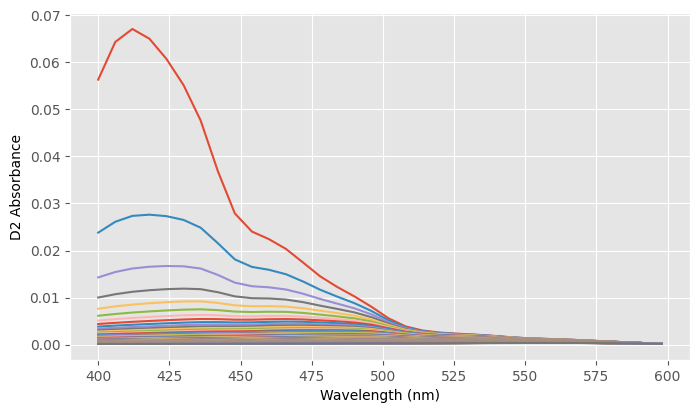

In [9]:
# X2 = savgol_filter(X1, 17, polyorder = 2,deriv=2)
 

plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.show()

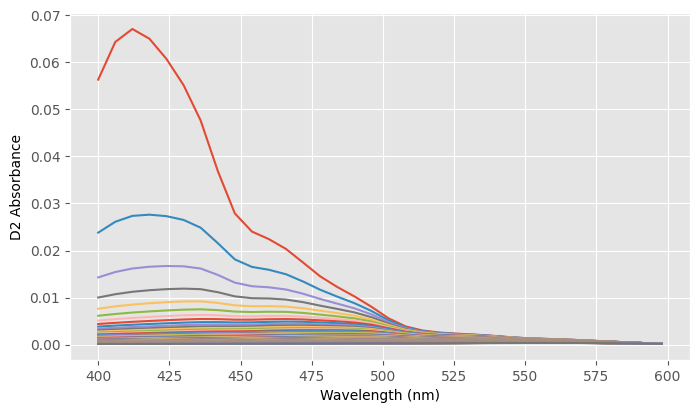

In [10]:
X2 = savgol_filter(X, 17, polyorder = 2,deriv=2)
 

plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.show()

In [11]:
y_c1 = pls_opt.predict(X1)
score_c = r2_score(y1, y_c1)
mse_c = mean_squared_error(y1, y_c1)
mae_c=mean_absolute_error(y1,y_c1)


print('R2 calib: %5.3f'  % score_c)
print('MAE calib: %5.3f' % mae_c)
print('MSE calib: %5.3f' % mse_c)
 


R2 calib: 0.972
MAE calib: 0.048
MSE calib: 0.002


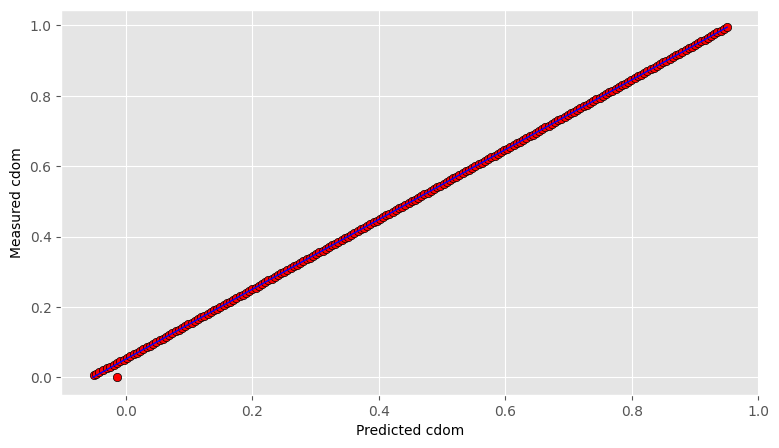

In [12]:
rangey = max(y1) - min(y1)
rangex = max(y_c1) - min(y_c1)


z = np.polyfit(y1, y_c1, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c1, y1, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y1), y1, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
#     ax.plot(y, y1, color='green', linewidth=1)
#         plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted cdom')
    plt.ylabel('Measured cdom')

    plt.show()